In [3]:
import pandas as pd

def read_csv(filename):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)

    return df

# Example usage
filename = "nifty_50_7_day_1_min.csv"
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Read the CSV file with specified columns
data = read_csv(filename)
selected_data = data[columns]

print(selected_data.head())

           Open          High           Low         Close     Adj Close  \
0  22582.500000  22657.400391  22580.599609  22648.800781  22648.800781   
1  22653.650391  22658.300781  22642.650391  22655.400391  22655.400391   
2  22653.449219  22657.050781  22645.000000  22650.250000  22650.250000   
3  22649.349609  22659.699219  22645.550781  22650.599609  22650.599609   
4  22650.349609  22652.199219  22644.500000  22649.050781  22649.050781   

   Volume  
0       0  
1       0  
2       0  
3       0  
4       0  


In [6]:
data.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2024-05-02 09:15:00+05:30,22582.500000,22657.400391,22580.599609,22648.800781,22648.800781,0
1,2024-05-02 09:16:00+05:30,22653.650391,22658.300781,22642.650391,22655.400391,22655.400391,0
2,2024-05-02 09:17:00+05:30,22653.449219,22657.050781,22645.000000,22650.250000,22650.250000,0
3,2024-05-02 09:18:00+05:30,22649.349609,22659.699219,22645.550781,22650.599609,22650.599609,0
4,2024-05-02 09:19:00+05:30,22650.349609,22652.199219,22644.500000,22649.050781,22649.050781,0


In [7]:
data['Returns'] = data['Close'].pct_change() * 100

In [8]:
data

,Datetime,Open,High,Low,Close,Adj Close,Volume,Returns
0,2024-05-02 09:15:00+05:30,22582.500000,22657.400391,22580.599609,22648.800781,22648.800781,0,NaN
1,2024-05-02 09:16:00+05:30,22653.650391,22658.300781,22642.650391,22655.400391,22655.400391,0,0.029139
2,2024-05-02 09:17:00+05:30,22653.449219,22657.050781,22645.000000,22650.250000,22650.250000,0,-0.022734
3,2024-05-02 09:18:00+05:30,22649.349609,22659.699219,22645.550781,22650.599609,22650.599609,0,0.001544
4,2024-05-02 09:19:00+05:30,22650.349609,22652.199219,22644.500000,22649.050781,22649.050781,0,-0.006838
...,...,...,...,...,...,...,...,...
744,2024-05-03 15:25:00+05:30,22478.750000,22479.849609,22472.550781,22475.400391,22475.400391,0,-0.014015
745,2024-05-03 15:26:00+05:30,22474.599609,22476.900391,22469.750000,22473.949219,22473.949219,0,-0.006457
746,2024-05-03 15:27:00+05:30,22474.150391,22478.300781,22469.000000,22473.300781,22473.300781,0,-0.002885
747,2024-05-03 15:28:00+05:30,22473.599609,22474.599609,22454.599609,22456.550781,22456.550781,0,-0.074533


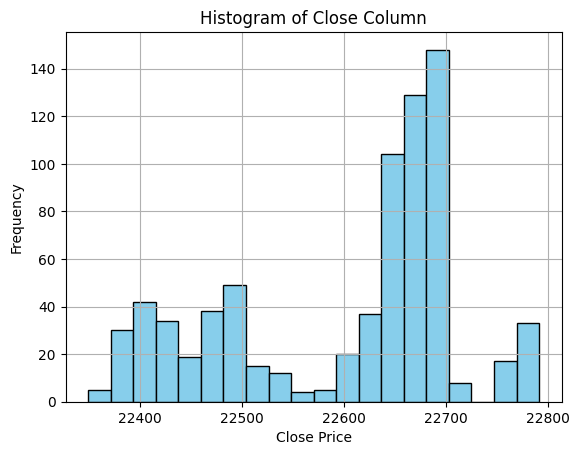

In [9]:
import matplotlib.pyplot as plt

# Plot histogram of the "Close" column
plt.hist(data['Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Close Column')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

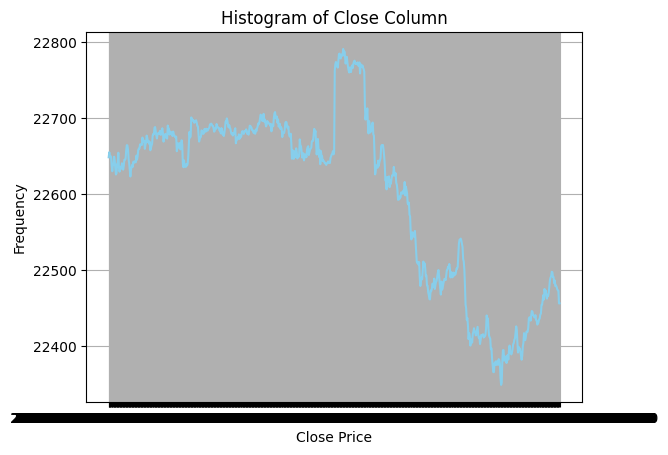

In [30]:
# Plot histogram of the "Close" column
plt.plot(data['Datetime'], data['Close'],color='skyblue')
plt.title('Histogram of Close Column')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

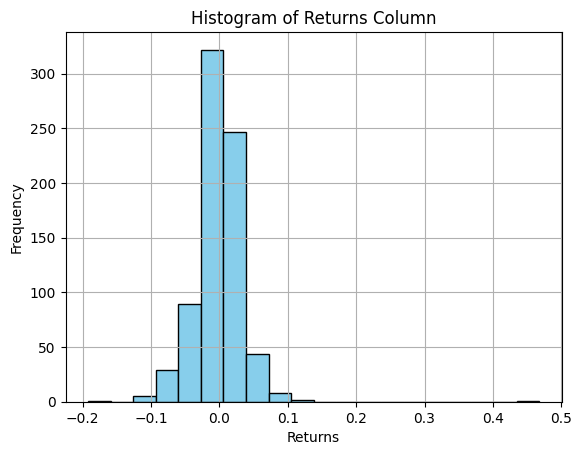

In [10]:
# Plot histogram of the "Close" column
plt.hist(data['Returns'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Returns Column')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

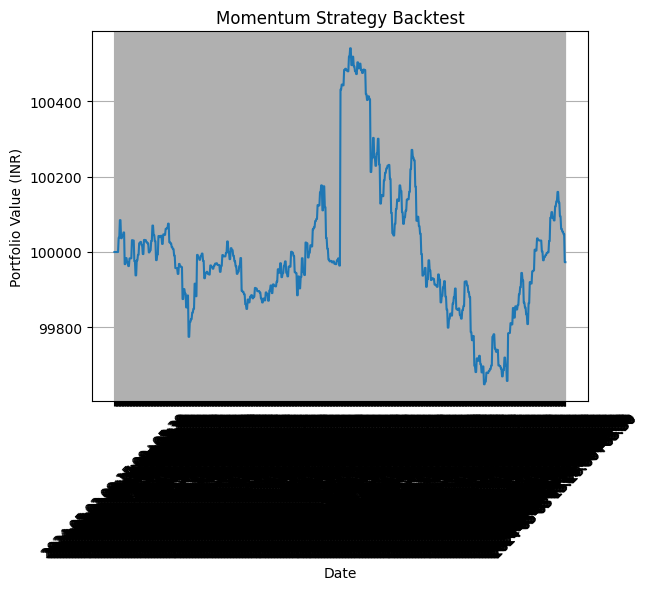

In [26]:
data['MA50'] = data['Close'].rolling(window=3).mean()
data['MA200'] = data['Close'].rolling(window=7).mean()

# Generate buy and sell signals based on moving average crossover
data['Signal'] = 0
data.loc[data['MA50'] > data['MA200'], 'Signal'] = 1  # Buy signal
data.loc[data['MA50'] < data['MA200'], 'Signal'] = -1  # Sell signal

# Backtest the strategy
initial_capital = 100000  # Initial capital in INR
position = 0  # 0 for no position, 1 for long position, -1 for short position
portfolio_value = [initial_capital]  # List to store portfolio value over time

for i in range(1, len(data)):
    if data['Signal'][i] == 1 and position == 0:  # Buy signal and no position
        position = 1
        shares_bought = initial_capital / data['Close'][i]
        initial_capital = 0
    
    elif data['Signal'][i] == -1 and position == 1:  # Sell signal and long position
        position = 0
        initial_capital = shares_bought * data['Close'][i]
        shares_bought = 0

    elif data['Signal'][i] == -1 and position == 0:  # Sell signal and no position
        position = -1
        shares_bought = -initial_capital / data['Close'][i]

    elif data['Signal'][i] == 1 and position == -1:  # Buy signal and short position
        position = 0
        initial_capital = -shares_bought*data['Close'][i]
        shares_bought = 0
    
    else:  # No signal or already in position, square off existing position
        if position == 1:  # Close long position
            position = 0
            initial_capital = shares_bought * data['Close'][i]
            shares_bought = 0

        if position == -1:  # Close long position
            position = 0
            initial_capital = -shares_bought * data['Close'][i]
            shares_bought = 0

    p_val = initial_capital + shares_bought * data['Close'][i] if shares_bought > 0  else initial_capital
    portfolio_value.append(p_val)

# Plot portfolio value over time
plt.plot(data['Datetime'], portfolio_value)
plt.title('Momentum Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [18]:
data[['Close','Signal']]

,Close,Signal
0,22648.800781,0
1,22655.400391,0
2,22650.250000,0
3,22650.599609,0
4,22649.050781,0
...,...,...
744,22475.400391,-1
745,22473.949219,-1
746,22473.300781,-1
747,22456.550781,-1


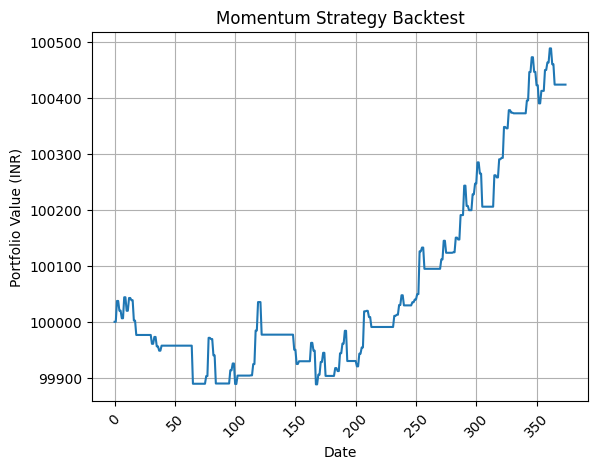

In [50]:
data['MA50'] = data['Close'].rolling(window=3).mean()
data['MA200'] = data['Close'].rolling(window=9).mean()

# Generate buy and sell signals based on moving average crossover
data['Signal'] = 0
data.loc[data['MA50'] > data['MA200'], 'Signal'] = 1  # Buy signal
data.loc[data['MA50'] < data['MA200'], 'Signal'] = -1  # Sell signal

# Backtest the strategy
initial_capital = 100000  # Initial capital in INR
position = 0  # 0 for no position, 1 for long position, -1 for short position
portfolio_value = [initial_capital]  # List to store portfolio value over time
shares_bought = 0

for i in range(len(data)//2+1, len(data)):
    if data['Signal'][i] == 1 and position == 0:  # Buy signal and no position
        position = 1
        shares_bought = initial_capital / data['Close'][i]
        initial_capital = 0
    elif data['Signal'][i] == -1 and position == 1:  # Sell signal and long position
        position = 0
        initial_capital = shares_bought * data['Close'][i]
        shares_bought = 0
    else:  # No signal or already in position, square off existing position
        if position == 1:  # Close long position
            position = 0
            initial_capital = shares_bought * data['Close'][i]
            shares_bought = 0

    portfolio_value.append(initial_capital + shares_bought * data['Close'][i])

# Plot portfolio value over time
plt.plot(portfolio_value)
plt.title('Momentum Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
portfolio_value[-1] - portfolio_value[0]

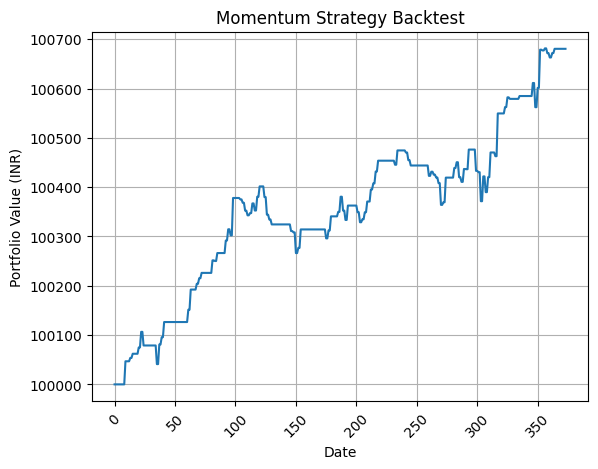

In [52]:
data['MA50'] = data['Close'].rolling(window=3).mean()
data['MA200'] = data['Close'].rolling(window=9).mean()

# Generate buy and sell signals based on moving average crossover
data['Signal'] = 0
data.loc[data['MA50'] > data['MA200'], 'Signal'] = 1  # Buy signal
data.loc[data['MA50'] < data['MA200'], 'Signal'] = -1  # Sell signal

# Backtest the strategy
initial_capital = 100000  # Initial capital in INR
position = 0  # 0 for no position, 1 for long position, -1 for short position
portfolio_value = [initial_capital]  # List to store portfolio value over time
shares_bought = 0

for i in range(1, len(data)//2):
    if data['Signal'][i] == -1 and position == 0:  # Buy signal and no position
        position = -1
        shares_bought = -initial_capital / data['Close'][i]
    elif data['Signal'][i] == 1 and position == -1:  # Sell signal and long position
        position = 0
        initial_capital = -shares_bought * data['Close'][i]
        shares_bought = 0
    else:  # No signal or already in position, square off existing position
        if position == -1:  # Close long position
            position = 0
            initial_capital = -shares_bought * data['Close'][i]
            shares_bought = 0

    portfolio_value.append(initial_capital)

# Plot portfolio value over time
plt.plot(portfolio_value)
plt.title('Momentum Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [53]:
portfolio_value[-1] - portfolio_value[0]

680.517094031864